In [1]:
import librosa
import numpy as np

In [5]:
def generate_Spectogram(audio_path):
    # wav, sr = librosa.load(audio_path, sr=44100, mono=False)
    wav, sr = librosa.load(audio_path, sr=None, mono=False)

    # If stereo, process both channels
    if wav.ndim == 2:
        _ = np.mean(wav, axis=0)  # ((9,0), (2,3)) -> (4.5, 2.5)

    # Generate spectrogram
    hop_length = 512  # Match your hopSize
    n_fft = 1024  # Match your windowSize

    D = librosa.stft(
        wav, n_fft=n_fft, hop_length=hop_length
    )  ## https://librosa.org/doc/latest/generated/librosa.decompose.decompose.html
    ## we still gotta figure out the diff b/w Librosa's fft and Scipy's fft and numpy's fft
    ## LINK https://stackoverflow.com/questions/56286595/librosas-fft-and-scipys-fft-are-different
    S = np.abs(D)  # Convert to magnitude spectrogram
    return S


spec = generate_Spectogram("../data/Hold On, We're Going Home (feat. Majid Jordan).wav")

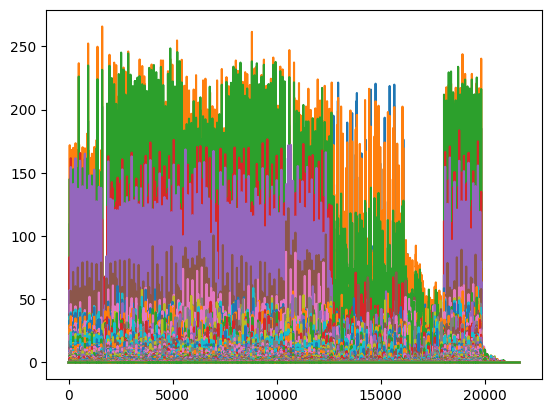

In [6]:
import matplotlib.pyplot as plt

plt.plot(spec[0].T)
plt.show()

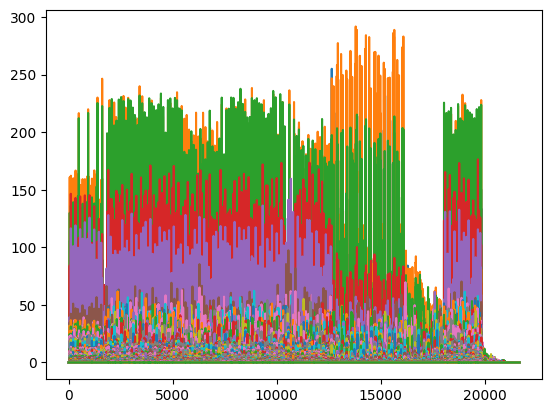

In [7]:
plt.plot(spec[1].T)
plt.show()

In [8]:
spec.shape

(2, 513, 21682)

In [9]:
hope = 100
sr = 100
# def fingerprint(spec):
bands = [(0, 10), (10, 20), (20, 40), (40, 80), (80, 160), (160, 512)]
j = 0
for index, frame in enumerate(spec.T):
    time = index * hope / sr
    for Low, High in bands:
        band = frame[Low, High]
        if band == 0:
            continue
        else:
            maxVal = band[np.argmax(band)]
            if maxVal > np.mean(band):
                print(maxVal)

IndexError: index 10 is out of bounds for axis 1 with size 2